In [47]:
import h5py
import pyfits
import healpy


f = h5py.File("test.hdf5", "w")




In [2]:
d = np.random.ranf((2000,2000))
dset1 = f.create_dataset('/templates/test1', (2000,2000), dtype='float32')
dset1[...]+=d

In [3]:
f.close()

In [4]:
for name in f: print name

print f['/templates'].items()

ValueError: Not a location id (Invalid object id)

Writing brem
Writing brem_0
Writing energies
Writing ics_cmb
Writing ics_fir
Writing ics_opt
Writing pi0
Writing pi0_0


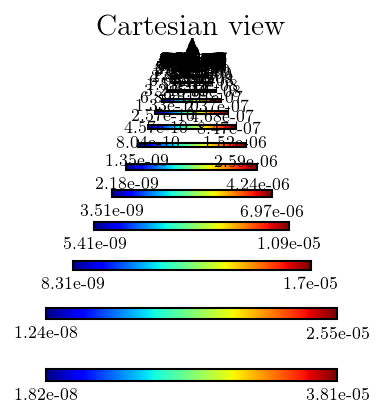

In [4]:

# f = h5py.File("base.hdf5",'r')

# diff_path = '/home/carlson/fermitools/refdata/fermi/galdiffuse/gll_iem_v05.fits'
# diff_model = pyfits.open(diff_path)
# diff_model.info()

# for i in range(diff_model[0].data.shape[0]):
#     print diff_model[0].data[i].min()

import h5py, healpy, pyfits
                        
def Healpix2Cartesian(fname):                        
    # Read from hdf5 file
    f = h5py.File(fname,'r')
    
    for t in f['templates/']:
        print "Writing", t
        if t=="energies": 
            continue
        
        
        # Get the cartesian maps for each energy
        hpixcube = f['templates/'+t][()]
        cartcube = np.zeros((hpixcube.shape[0], 721,1440), dtype=np.float32)
        for i in range(hpixcube.shape[0]):
            cartcube[i] = healpy.cartview(hpixcube[i], hold=True, return_projected_map=True,
                                                  xsize=1440, lonra=[-179.875, 179.875],flip='geo')
            plt.gcf()
        
        # Generate new hdu object
        hdu_new = pyfits.PrimaryHDU(cartcube.astype(np.float32))
        

        # Copy galdef into header
        galdef = dict(f['/galdef'].attrs.items())
        hdu_new.header.add_comment("Diffuse model generated by Eric Carlson (erccarls@ucsc.edu)")
        for key, val in galdef.items():
            hdu_new.header.add_comment(key + "=" +val)
        
        hdu_new.header['CRVAL1'] = 0.0
        hdu_new.header['CRPIX1'] = 720
        hdu_new.header['CDELT1'] = 0.25
        hdu_new.header['CUNIT2']= 'deg'
        hdu_new.header['CTYPE2']= 'GLON-CAR'
        hdu_new.header['CRVAL2'] = 0
        hdu_new.header['CRPIX2'] = 361
        hdu_new.header['CDELT2'] = 0.25
        hdu_new.header['CUNIT2']= 'deg'
        hdu_new.header['CTYPE2']= 'GLAT-CAR'
        hdu_new.header['CRVAL3'] = float(galdef['E_gamma_min'])
        hdu_new.header['CRPIX3'] = 0
        hdu_new.header['CDELT3'] = np.log10(float(galdef['E_gamma_factor']))
        hdu_new.header['CTYPE2']= 'Energy'
        hdu_new.header['CUNIT3']= 'MeV'
        hdu_new.header['EXTEND']=True
        hdu_new.header['CREATOR'] = ('Eric Carlson (erccarls@ucsc.edu)', '')

        # Write energy extension table
        energies = np.array([50*float(galdef['E_gamma_factor'])**i for i in range(cartcube.shape[0])])
        tbhdu = pyfits.BinTableHDU.from_columns([
                pyfits.Column(name='Energy', format='D', array=energies),])
        tbhdu.header['EXTNAME']="ENERGIES"
        
        hdulist = pyfits.HDUList([hdu_new,tbhdu])
        
        # Write to file
        fname_out = fname.split('.')[0]+"_"+t +'.fits'
        hdulist.writeto(fname_out,clobber=True)
        
        
Healpix2Cartesian('base.hdf5')

In [ ]:
for a in f['/templates']: print a
    
print f['/fit_results/global'].attrs.items()

    

In [40]:

print float(galdef['E_gamma_min'])
print np.log10(float(galdef['E_gamma_factor']))


50.0
0.113828616594


brem
brem_0
energies
ics_cmb
ics_fir
ics_opt
pi0
pi0_0


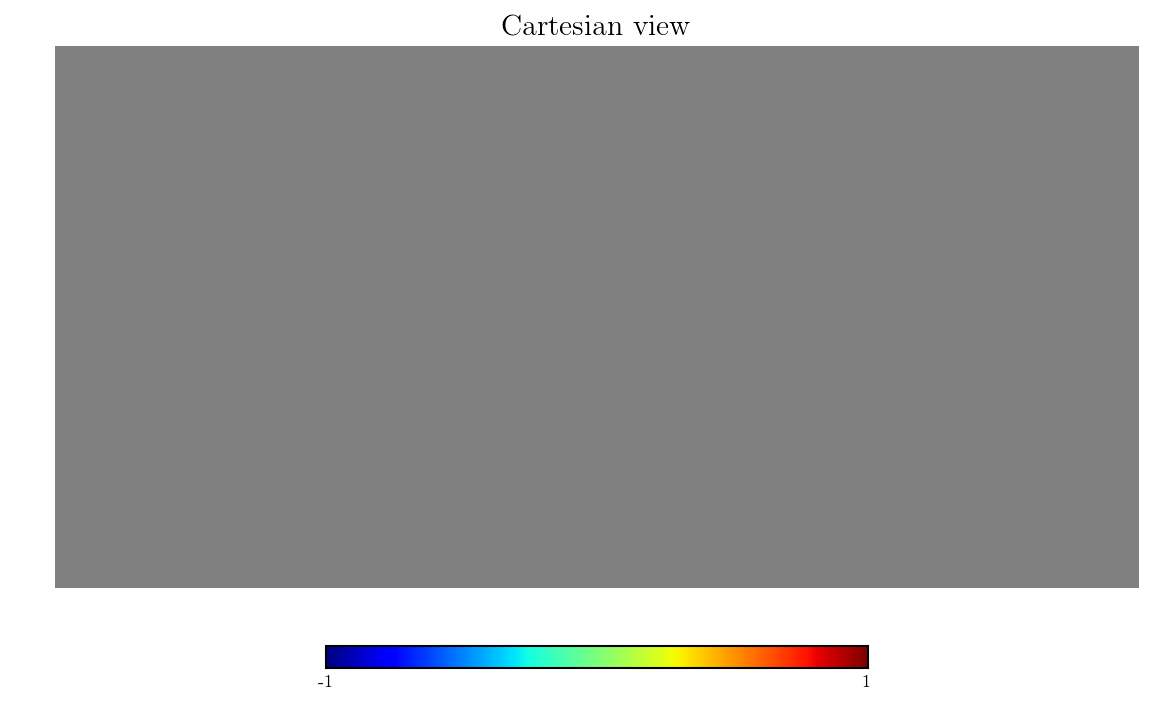

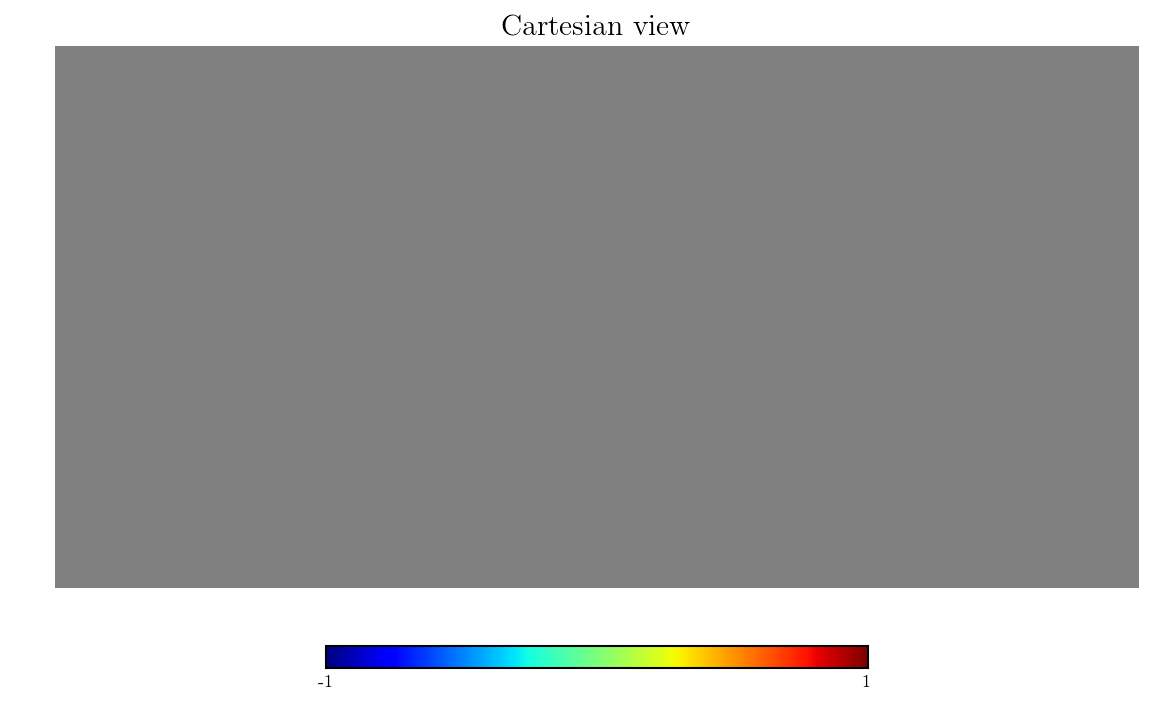

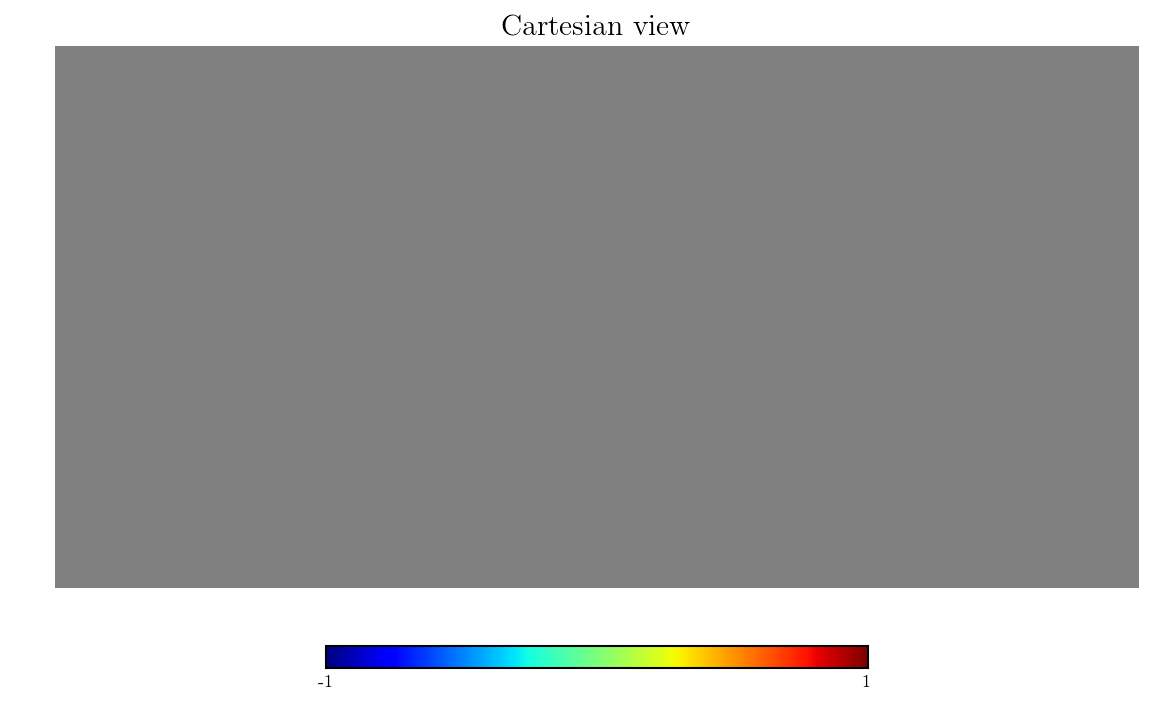

In [13]:
import h5py, healpy

# Read from hdf5 file
f = h5py.File('/data/galprop2/output/mod_q_4_XCO_P8.hdf5','r')
for t in f['/templates']:
    print t
    if t in ['brem', 'pi0', 'ics_opt']:
    
        data = f['/templates/'+t][...]

        healpy.cartview(data[10])

In [1]:
import healpy

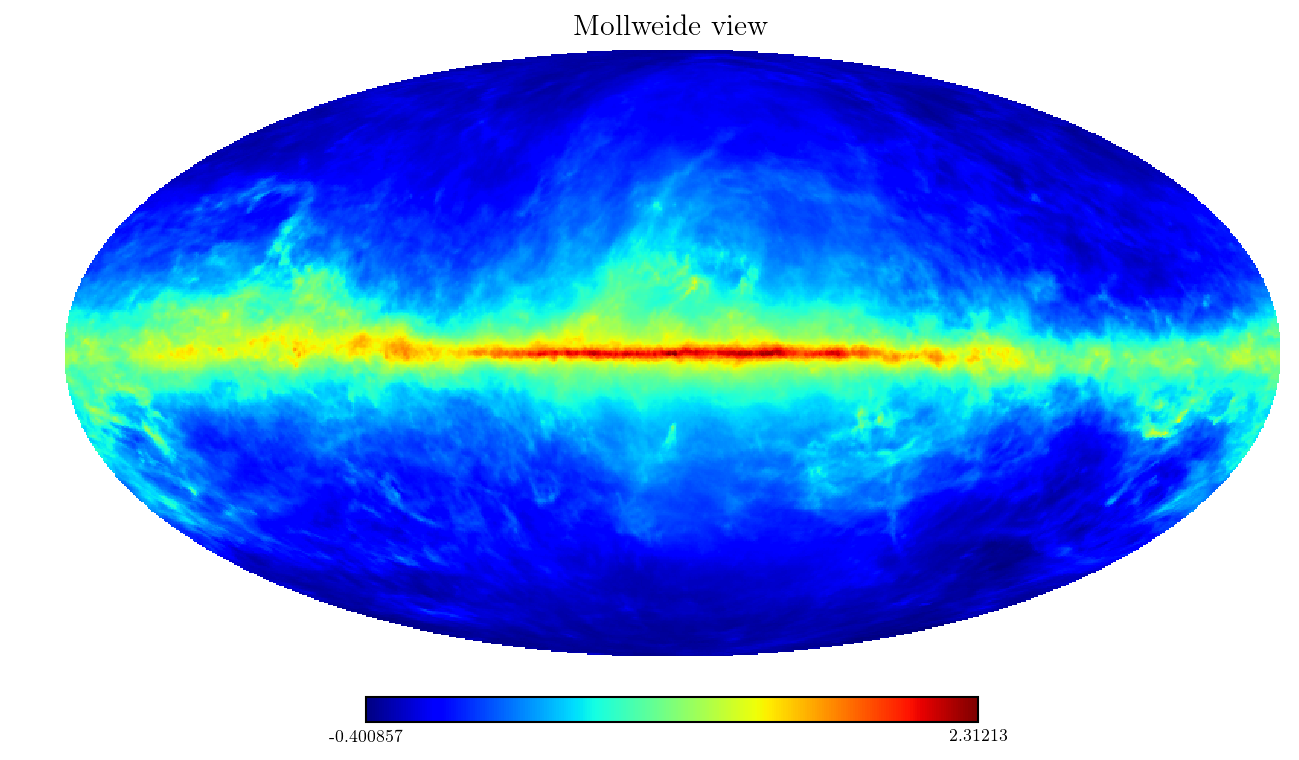

In [4]:
fd = np.load('/data/GCE_sys/fermi_diffuse_P8R2_CLEAN_V6_calore.npy')[10]

healpy.mollview(np.log10(fd))